# K Means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
%matplotlib inline

In [2]:
df=pd.read_csv('Data/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X=df.iloc[:,[3,4]].values

In [4]:
from sklearn.cluster import KMeans
objective_function=[] 
for i in range(1,11):
    clustering=KMeans(n_clusters=i, init='k-means++')
    clustering.fit(X)
    objective_function.append(clustering.inertia_)
objective_function

[269981.28000000014,
 183257.8615446179,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37455.98455516028,
 30552.714025467285,
 25044.96776401891,
 21932.392044240973,
 20067.316562465163]

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

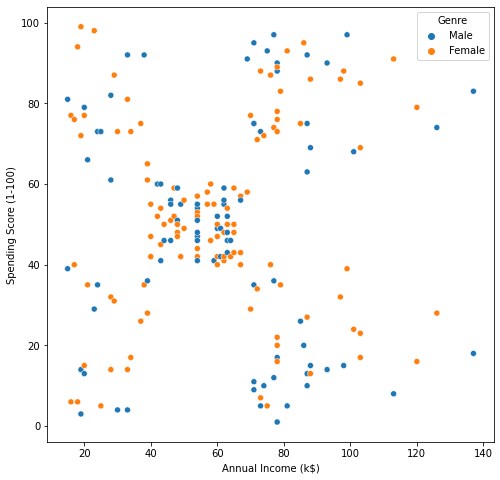

In [5]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Annual Income (k$)' , y = 'Spending Score (1-100)',data=df , hue='Genre')

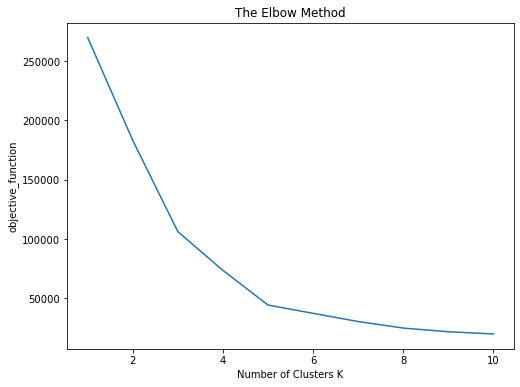

In [8]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11),objective_function)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters K")
plt.ylabel("objective_function")
plt.show()

In [9]:
tuned_clustering=KMeans(n_clusters=5,init='k-means++',random_state=0)
labels=tuned_clustering.fit_predict(X)
tuned_clustering.cluster_centers_[:]

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

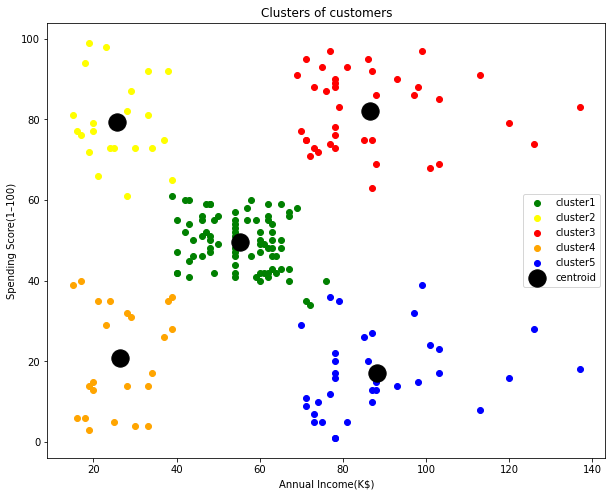

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(X[labels==0,0],X[labels==0,1],c='green',label='cluster1')
plt.scatter(X[labels==1,0],X[labels==1,1],c='yellow',label='cluster2')
plt.scatter(X[labels==2,0],X[labels==2,1],c='red',label='cluster3')
plt.scatter(X[labels==3,0],X[labels==3,1],c='orange',label='cluster4')
plt.scatter(X[labels==4,0],X[labels==4,1],c='blue',label='cluster5')
plt.scatter(tuned_clustering.cluster_centers_[:,0],tuned_clustering.cluster_centers_[:,1],s=300,c='black',label='centroid')
plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1–100)')
plt.legend()
plt.show()    

For n_clusters = 2 The average silhouette_score is : 0.3273163942500746
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.5379675585622219
For n_clusters = 7 The average silhouette_score is : 0.5270287298101395
For n_clusters = 8 The average silhouette_score is : 0.4548653400650936
For n_clusters = 9 The average silhouette_score is : 0.4595491760122954


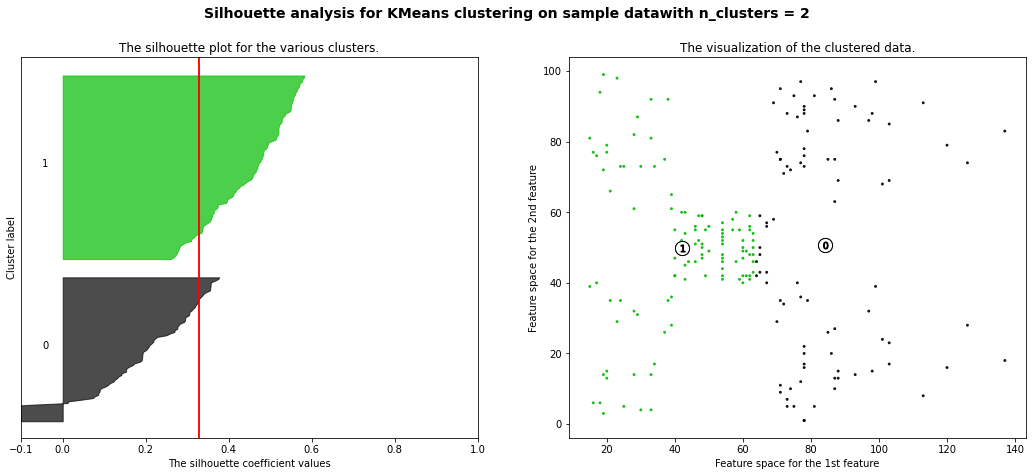

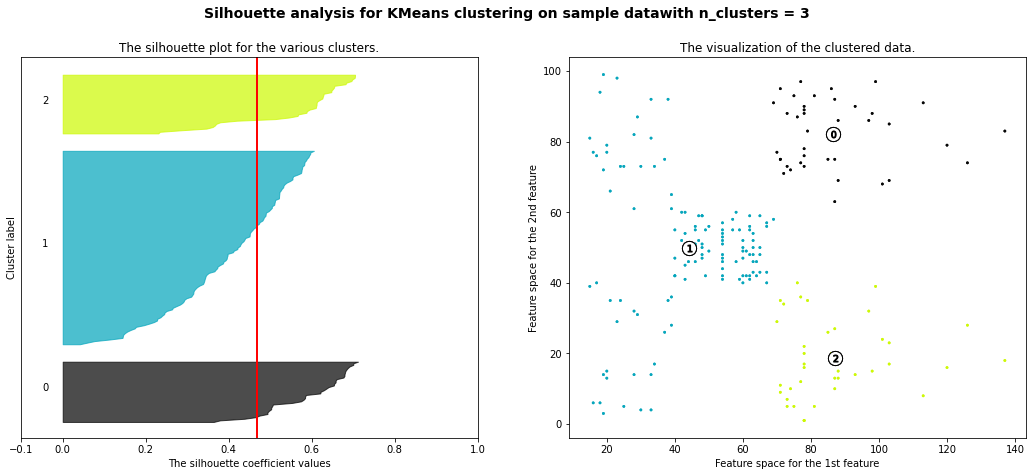

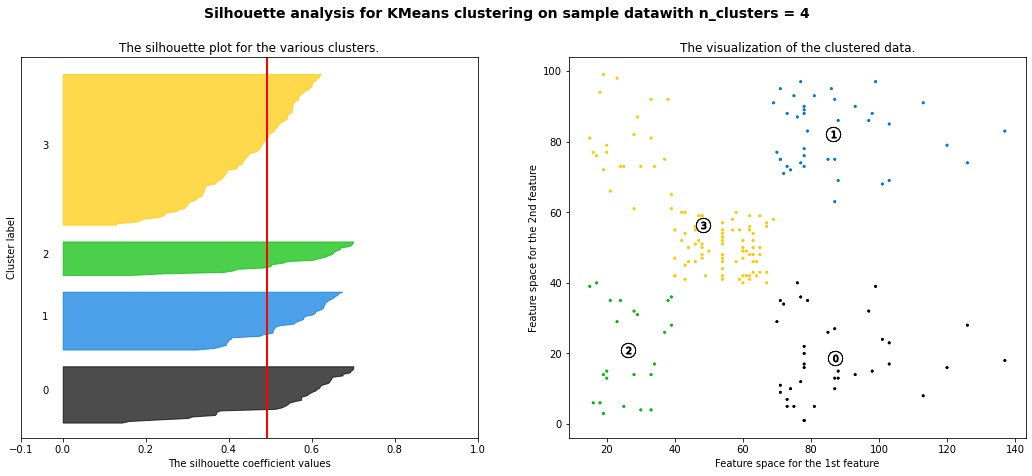

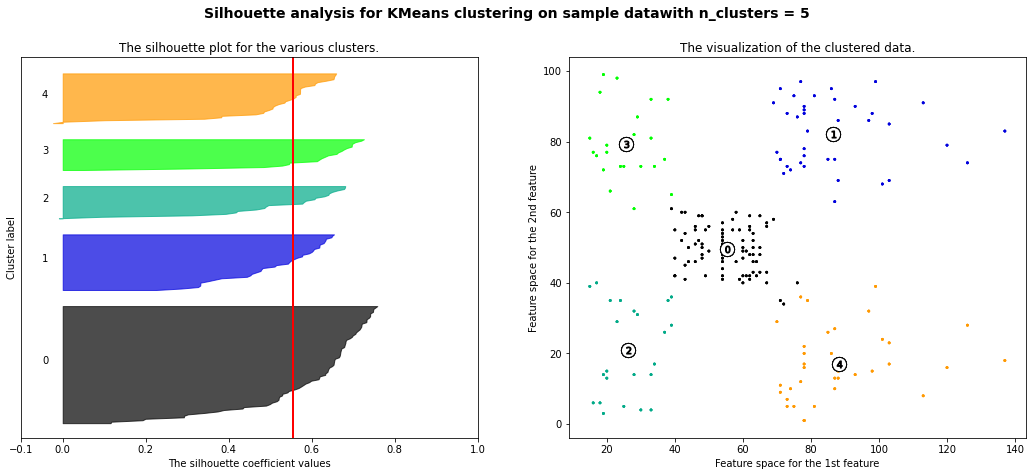

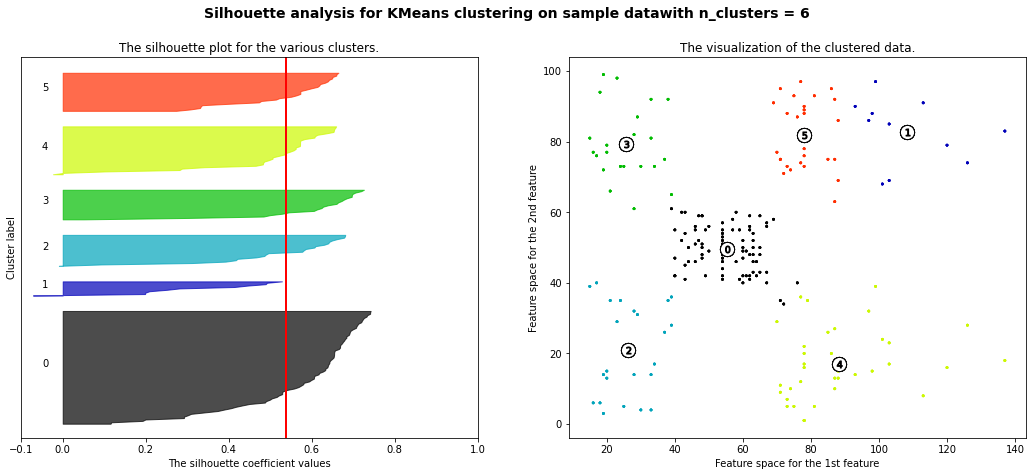

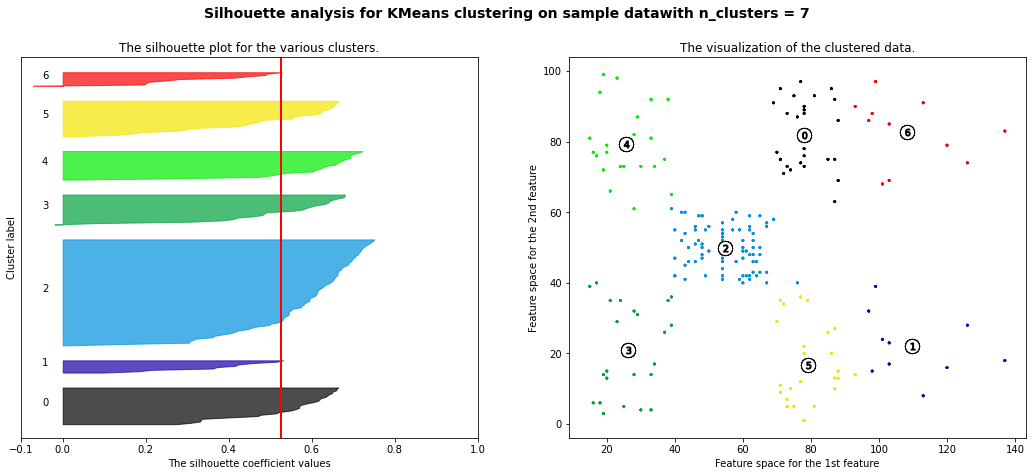

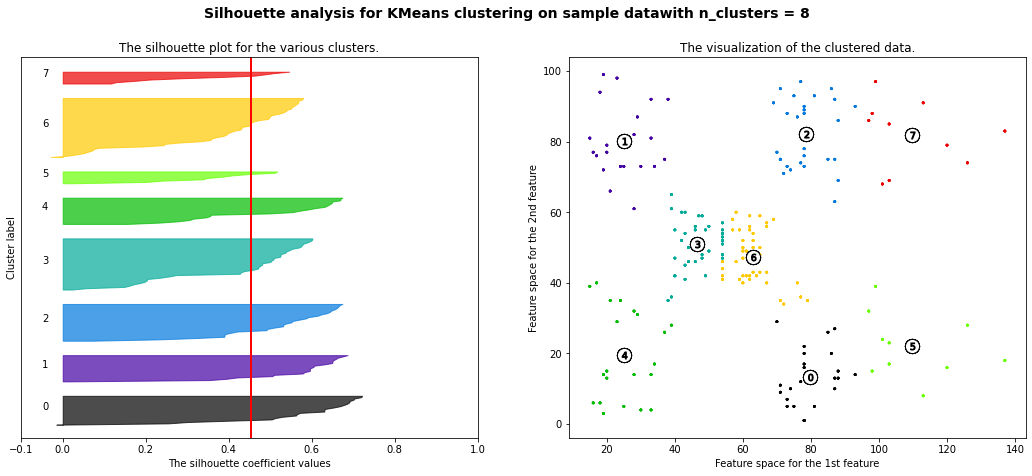

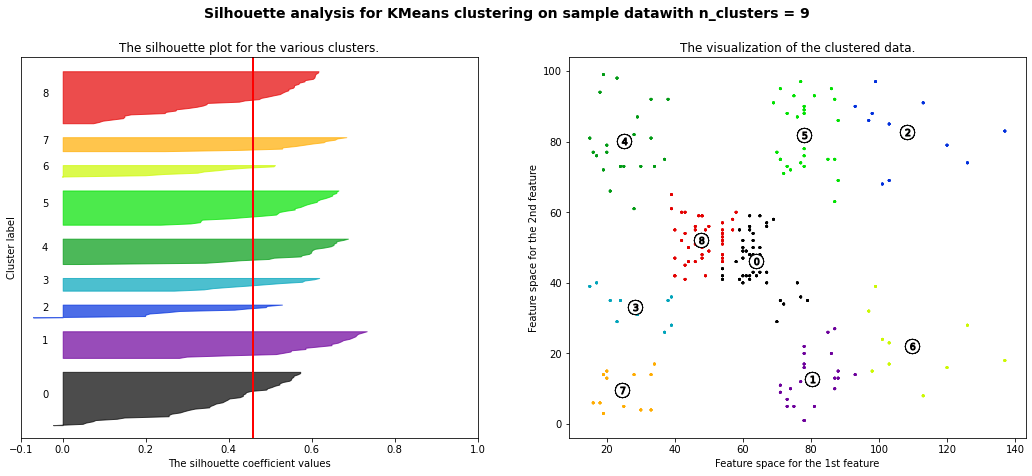

In [11]:
for n_clusters in range(2,10):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10

    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        ax1.axvline(x=silhouette_avg, color="red", linestyle="-")
        ax1.set_yticks([]) 
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
        c=colors, edgecolor='k')
        centers = clusterer.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
        c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
        s=50, edgecolor='k')
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data" 
        "with n_clusters = %d" % n_clusters),
        fontsize=14, fontweight='bold')
plt.show()

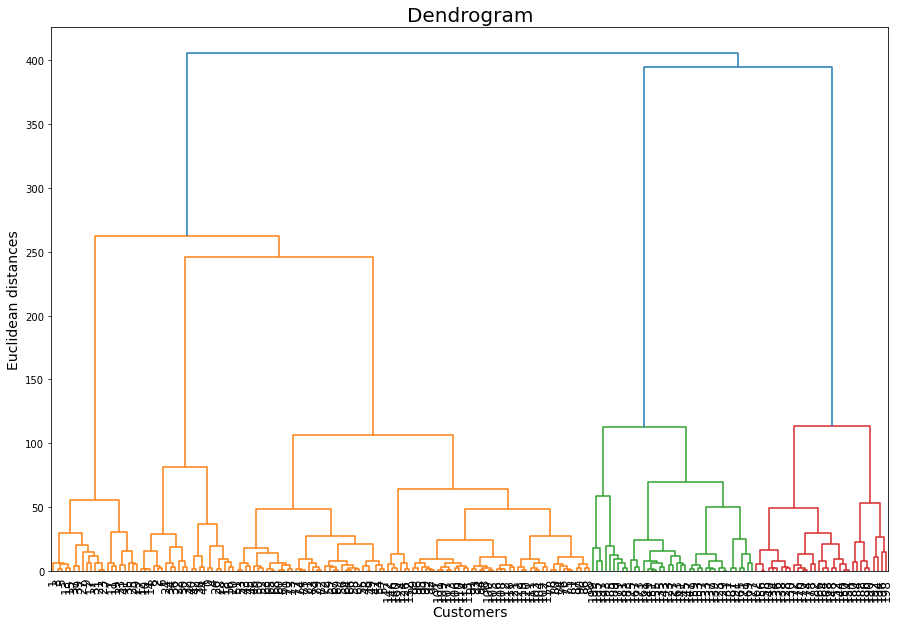

In [18]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,10))
cluster_visualising=sch.dendrogram(sch.linkage(df.iloc[:,[3,4]].values,method='ward'))
plt.title('Dendrogram',size=20)
plt.xlabel('Customers',size=14)
plt.ylabel('Euclidean distances',size=14)
plt.xticks(rotation=90, size=12)
plt.show()